#HW6 Control with Approximation


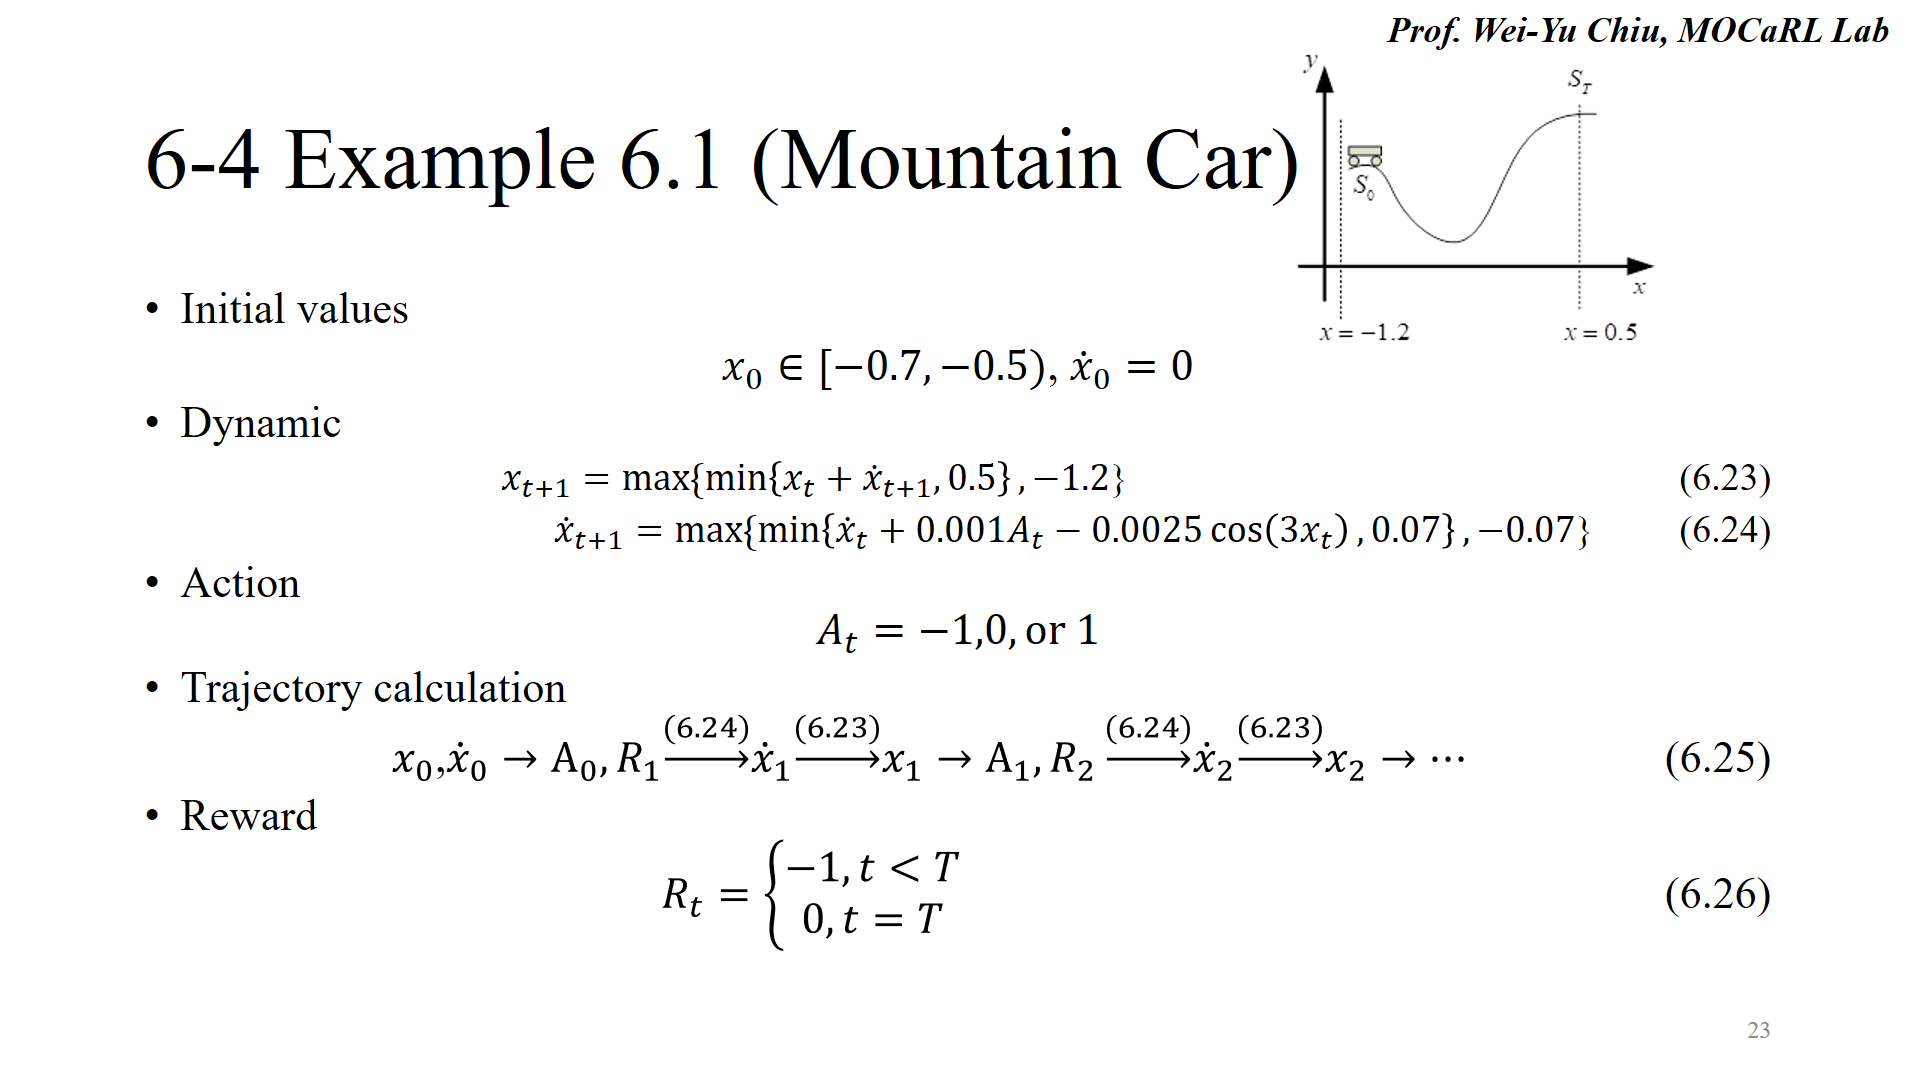

In [1]:
!pip install brokenaxes==0.2
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import numpy.random as rd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Environment
def step(state, action):
    position = state[0]
    velocity = state[1]
    acc = action -1
    new_velocity = velocity + 0.001 * acc - 0.0025 * np.cos(3 * position)
    new_velocity = min(max(-0.07, new_velocity), 0.07)
    new_position = position + new_velocity
    new_position = min(max(-1.2, new_position), 0.5)
    reward = -1.0
    if new_position == -1.2:
        new_velocity = 0.0
    return [new_position, new_velocity], reward

In [3]:
#2 tilings
# Tile coding
class Approximate_Q_learning():
    def __init__(self):

        self.alpha = 0.05
        self.gamma = 0.99
        self.epsilon = 0.005

        # set up position tile 
        pos_range = [-1.2, 0.5]
        pos_side_num = 15
        l_pos = pos_side_num / (pos_side_num - 1 + 1 / 2) #6.13
        p_pos = l_pos / (2 * pos_side_num) #6.14

         # set up velocity tile 
        vel_range = [-0.07, 0.07]
        vel_side_num = 5
        l_vel = vel_side_num/(vel_side_num-1+1/2) #6.13
        p_vel = l_vel/(2*vel_side_num) #6.14

        # set up tiling 1
        pos_range1 = [pos_range[0], pos_range[1] + (2-1)*p_pos]
        vel_range1 = [vel_range[0], vel_range[1] + (2-1)*p_vel]

        # set up tiling 2
        pos_range2 = [pos_range[0] - p_pos, pos_range[1]]
        vel_range2 = [vel_range[0] - p_vel, vel_range[1]]

        # make grid in tiling 1
        self.pos_bin1 = np.linspace(pos_range1[0], pos_range1[1], num=pos_side_num)
        self.vel_bin1 = np.linspace(vel_range1[0], vel_range1[1], num=vel_side_num)

        # make grid in tiling 2
        self.pos_bin2 = np.linspace(pos_range2[0], pos_range2[1], num=pos_side_num)
        self.vel_bin2 = np.linspace(vel_range2[0], vel_range2[1], num=vel_side_num)

        # make storage space to weight of tiling1 and tiling2
        self.tiling1 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling2 = np.zeros([pos_side_num, vel_side_num, 3])

    # check which tile would be activated
    def state_coding(self, state):
        i_pos1 = np.digitize([state[0]], self.pos_bin1, right=True)[0]
        i_vel1 = np.digitize([state[1]], self.vel_bin1, right=True)[0]

        i_pos2 = np.digitize([state[0]], self.pos_bin2, right=True)[0]
        i_vel2 = np.digitize([state[1]], self.vel_bin2, right=True)[0]

        return (i_pos1, i_vel1, i_pos2, i_vel2)

    # evaluate q-value
    def evaluate_Q(self, coded_state, action):
        Q = self.tiling1[coded_state[0], coded_state[1], action] + self.tiling2[coded_state[2], coded_state[3], action]
        return Q
    # update weight of tile
    def update_Q(self, state, action, reward, next_state, S_t):

        coded_state = self.state_coding(state)
        coded_next_state = self.state_coding(next_state)
        Q = self.evaluate_Q(coded_state, action)

        if state[0] >= S_t:
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward - Q)
        else:
            Q_ = np.max([self.evaluate_Q(coded_next_state, i) for i in range(3)])
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward + self.gamma * Q_ - Q)

    # epsilon greedy action
    def act(self, state):
        coded_state = self.state_coding(state)

        if np.random.rand() < self.epsilon:
            action = np.random.randint(3)
        else:
            action = np.argmax([self.evaluate_Q(coded_state, i) for i in range(3)])
        return action



In [4]:
#3 tilings
class Approximate_Q_learning_3():
    def __init__(self):

        self.alpha = 0.05
        self.gamma = 0.99
        self.epsilon = 0.005

        # set up position tile 
        pos_range = [-1.2, 0.5]
        pos_side_num = 15
        l_pos = pos_side_num / (pos_side_num - 1 + 1 / 3) #6.13
        p_pos = l_pos / (3 * pos_side_num) #6.14

         # set up velocity tile 
        vel_range = [-0.07, 0.07]
        vel_side_num = 5
        l_vel = vel_side_num/(vel_side_num-1+1/3) #6.13
        p_vel = l_vel/(3*vel_side_num) #6.14

        # set up tiling 1
        pos_range1 = [pos_range[0], pos_range[1] + (3-1)*p_pos]
        vel_range1 = [vel_range[0], vel_range[1] + (3-1)*p_vel]

        # set up tiling 2
        pos_range2 = [pos_range[0], pos_range[1] + (3-2)*p_pos]
        vel_range2 = [vel_range[0], vel_range[1] + (3-2)*p_vel]

        # set up tiling 3
        pos_range3 = [pos_range[0] - p_pos, pos_range[1]]
        vel_range3 = [vel_range[0] - p_vel, vel_range[1]]

        # make grid in tiling 1
        self.pos_bin1 = np.linspace(pos_range1[0], pos_range1[1], num=pos_side_num)
        self.vel_bin1 = np.linspace(vel_range1[0], vel_range1[1], num=vel_side_num)

        # make grid in tiling 2
        self.pos_bin2 = np.linspace(pos_range2[0], pos_range2[1], num=pos_side_num)
        self.vel_bin2 = np.linspace(vel_range2[0], vel_range2[1], num=vel_side_num)

        # make grid in tiling 3
        self.pos_bin3 = np.linspace(pos_range3[0], pos_range3[1], num=pos_side_num)
        self.vel_bin3 = np.linspace(vel_range3[0], vel_range3[1], num=vel_side_num)

        # make storage space to weight of tiling1 and tiling2
        self.tiling1 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling2 = np.zeros([pos_side_num, vel_side_num, 3])
        self.tiling3 = np.zeros([pos_side_num, vel_side_num, 3])

    # check which tile would be activated
    def state_coding(self, state):
        i_pos1 = np.digitize([state[0]], self.pos_bin1, right=True)[0]
        i_vel1 = np.digitize([state[1]], self.vel_bin1, right=True)[0]

        i_pos2 = np.digitize([state[0]], self.pos_bin2, right=True)[0]
        i_vel2 = np.digitize([state[1]], self.vel_bin2, right=True)[0]

        i_pos3 = np.digitize([state[0]], self.pos_bin3, right=True)[0]
        i_vel3 = np.digitize([state[1]], self.vel_bin3, right=True)[0]

        return (i_pos1, i_vel1, i_pos2, i_vel2, i_pos3, i_vel3)

    # evaluate q-value
    def evaluate_Q(self, coded_state, action):
        Q = self.tiling1[coded_state[0], coded_state[1], action] + self.tiling2[coded_state[2], coded_state[3], action] + self.tiling3[coded_state[4], coded_state[5], action]
        return Q
    # update weight of tile
    def update_Q(self, state, action, reward, next_state, S_t):

        coded_state = self.state_coding(state)
        coded_next_state = self.state_coding(next_state)
        Q = self.evaluate_Q(coded_state, action)

        if state[0] >= S_t:
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward - Q)
            self.tiling2[coded_state[4], coded_state[5], action] += self.alpha * (reward - Q)
        else:
            Q_ = np.max([self.evaluate_Q(coded_next_state, i) for i in range(3)])
            self.tiling1[coded_state[0], coded_state[1], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling2[coded_state[2], coded_state[3], action] += self.alpha * (reward + self.gamma * Q_ - Q)
            self.tiling2[coded_state[4], coded_state[5], action] += self.alpha * (reward + self.gamma * Q_ - Q)

    # epsilon greedy action
    def act(self, state):
        coded_state = self.state_coding(state)

        if np.random.rand() < self.epsilon:
            action = np.random.randint(3)
        else:
            action = np.argmax([self.evaluate_Q(coded_state, i) for i in range(3)])
        return action



In [5]:
#2 tilings
# Simulation
def agent_Q(episodes_, alpha_):
    episodes = episodes_
    returns = np.zeros((episodes))
    agent = Approximate_Q_learning()
    agent.alpha = alpha_

    for episode in range(episodes):

        state = [np.random.uniform(-0.7, -0.5), 0]

        G = 0
        while state[0] < 0.5:
            action = agent.act(state)
            state_next, reward = step(state, action)
            agent.update_Q(state, action, reward, state_next, S_t=0.5)
            state = state_next
            G += reward
            if G < -500000:
              G = -500000
              return G

        print(episode, ' episode returns: ', G)

        returns[episode] = G

    return returns


In [6]:
#3 tilings
# Simulation
def agent_Q_3(episodes_, alpha_):
    episodes = episodes_
    returns = np.zeros((episodes))
    agent = Approximate_Q_learning_3()
    agent.alpha = alpha_

    for episode in range(episodes):

        state = [np.random.uniform(-0.7, -0.5), 0]

        G = 0
        while state[0] < 0.5:
            action = agent.act(state)
            state_next, reward = step(state, action)
            agent.update_Q(state, action, reward, state_next, S_t=0.5)
            state = state_next
            G += reward
            if G < -500000:
              G = -500000
              return G

        print(episode, ' episode returns: ', G)

        returns[episode] = G

    return returns


#Example function

0  episode returns:  -36430.0
1  episode returns:  -2870.0
2  episode returns:  -3862.0
3  episode returns:  -27207.0
4  episode returns:  -496.0
5  episode returns:  -694.0
6  episode returns:  -1917.0
7  episode returns:  -11193.0
8  episode returns:  -489.0
9  episode returns:  -492.0
10  episode returns:  -8833.0
11  episode returns:  -939.0
12  episode returns:  -1024.0
13  episode returns:  -319.0
14  episode returns:  -957.0
15  episode returns:  -944.0
16  episode returns:  -1122.0
17  episode returns:  -22202.0
18  episode returns:  -1093.0
19  episode returns:  -1323.0
20  episode returns:  -764.0
21  episode returns:  -1387.0
22  episode returns:  -473.0
23  episode returns:  -329.0
24  episode returns:  -289.0
25  episode returns:  -2470.0
26  episode returns:  -970.0
27  episode returns:  -3261.0
28  episode returns:  -600.0
29  episode returns:  -7806.0
30  episode returns:  -475.0
31  episode returns:  -920.0
32  episode returns:  -516.0
33  episode returns:  -631.0
34  

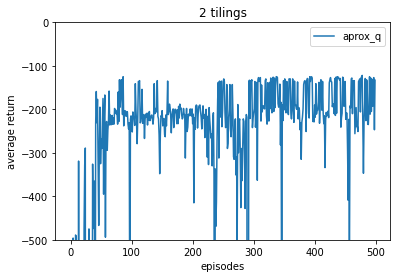

In [12]:
#2 tilings
episodes = 500
alpha = 0.05
last_100_sum = 0
last_100_avg_reward = 0
returns = agent_Q(episodes, alpha)
#print(returns)
for epi in range(episodes-100, episodes-1): 
        #print(epi)      
        last_100_sum += returns[epi]
        last_100_avg_reward = last_100_sum/100
print('average reward of last 100 episode:', last_100_avg_reward) 

plt.plot(returns, label='aprox_q')
plt.title('2 tilings')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

0  episode returns:  -6765.0
1  episode returns:  -21234.0
2  episode returns:  -1342.0
3  episode returns:  -1819.0
4  episode returns:  -872.0
5  episode returns:  -494.0
6  episode returns:  -631.0
7  episode returns:  -731.0
8  episode returns:  -487.0
9  episode returns:  -5140.0
10  episode returns:  -882.0
11  episode returns:  -586.0
12  episode returns:  -1691.0
13  episode returns:  -486.0
14  episode returns:  -2018.0
15  episode returns:  -1020.0
16  episode returns:  -2582.0
17  episode returns:  -439.0
18  episode returns:  -238.0
19  episode returns:  -255.0
20  episode returns:  -1297.0
21  episode returns:  -828.0
22  episode returns:  -2482.0
23  episode returns:  -611.0
24  episode returns:  -481.0
25  episode returns:  -9760.0
26  episode returns:  -809.0
27  episode returns:  -391.0
28  episode returns:  -1353.0
29  episode returns:  -511.0
30  episode returns:  -779.0
31  episode returns:  -379.0
32  episode returns:  -448.0
33  episode returns:  -1026.0
34  episo

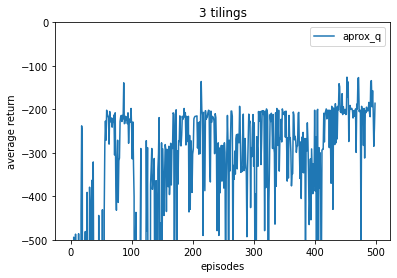

In [13]:
#3 tilings
episodes = 500
alpha = 0.05
last_100_sum = 0
last_100_avg_reward = 0
returns = agent_Q_3(episodes, alpha)
#print(returns)
for epi in range(episodes-100, episodes-1): 
        #print(epi)      
        last_100_sum += returns[epi]
        last_100_avg_reward = last_100_sum/100
print('average reward of last 100 episode:', last_100_avg_reward) 

plt.plot(returns, label='aprox_q')
plt.title('3 tilings')
plt.xlabel("episodes")
plt.ylabel('average return')
plt.ylim(-500, 0)
plt.legend()
plt.show()

0  episode returns:  -1515.0
1  episode returns:  -372.0
2  episode returns:  -303.0
3  episode returns:  -1233.0
4  episode returns:  -7118.0
5  episode returns:  -507.0
6  episode returns:  -372.0
7  episode returns:  -2162.0
8  episode returns:  -6631.0
9  episode returns:  -353.0
10  episode returns:  -299.0
11  episode returns:  -368.0
12  episode returns:  -458.0
13  episode returns:  -366.0
14  episode returns:  -243.0
15  episode returns:  -331.0
16  episode returns:  -3336.0
17  episode returns:  -901.0
18  episode returns:  -2932.0
19  episode returns:  -307.0
20  episode returns:  -794.0
21  episode returns:  -207.0
22  episode returns:  -224.0
23  episode returns:  -311.0
24  episode returns:  -609.0
25  episode returns:  -390.0
26  episode returns:  -1183.0
27  episode returns:  -292.0
28  episode returns:  -304.0
29  episode returns:  -724.0
30  episode returns:  -301.0
31  episode returns:  -328.0
32  episode returns:  -233.0
33  episode returns:  -955.0
34  episode retu

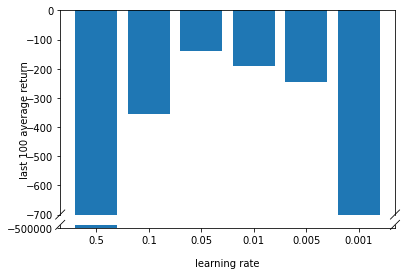

In [17]:
episodes = 500
compare_return = []
alpha_list = [0.5,0.1,0.05,0.01,0.005,0.001]
for alpha in alpha_list:
    last_100_sum = 0
    last_100_avg_reward = 0
    returns = agent_Q(episodes, alpha)
    #print(returns)
    if type(returns) == int:
       last_100_avg_reward = -500000
    else:
      for epi in range(episodes-100, episodes-1): 
        #print(epi)      
        last_100_sum += returns[epi]
        last_100_avg_reward = last_100_sum/100
    compare_return.append(last_100_avg_reward)
    print('-------\n average reward of last 100 episode:',last_100_avg_reward, '\n') 

#fig = plt.figure(figsize=(15,10))
bax = brokenaxes(ylims = ((-500000, -499990),(-700, 0)), hspace = 0.1, despine = False)
bax.set_xlabel("learning rate")
bax.set_ylabel('last 100 average return')
x_axis = ('0.5', '0.1', '0.05', '0.01', '0.005', '0.001')
y_axis = compare_return[0], compare_return[1], compare_return[2], compare_return[3], compare_return[4], compare_return[5] 
bax.bar(x_axis, y_axis)
plt.show()

#Question 1(20%)
Please see the 11 line in the following algorithm, what is the corresponding concept to the  Q-table method?
Why  it can't be coded like Q-table method?

A： 因為DQN使用了自助法，所以需要在初始化設定終點狀態，即Q-learning中的$Q(S_T)=0$，但在近似法中，難以定義終點的$Q$值，所以必須直接判斷$S'$是否為終點狀態，若是，即$S'=S_T$，就直接將第13行的$\gamma maxQ(S',a,w)$設為0；反之，若$S'$不為終點狀態，即$S'\neq S_T$，則使用正常的第13行式子。

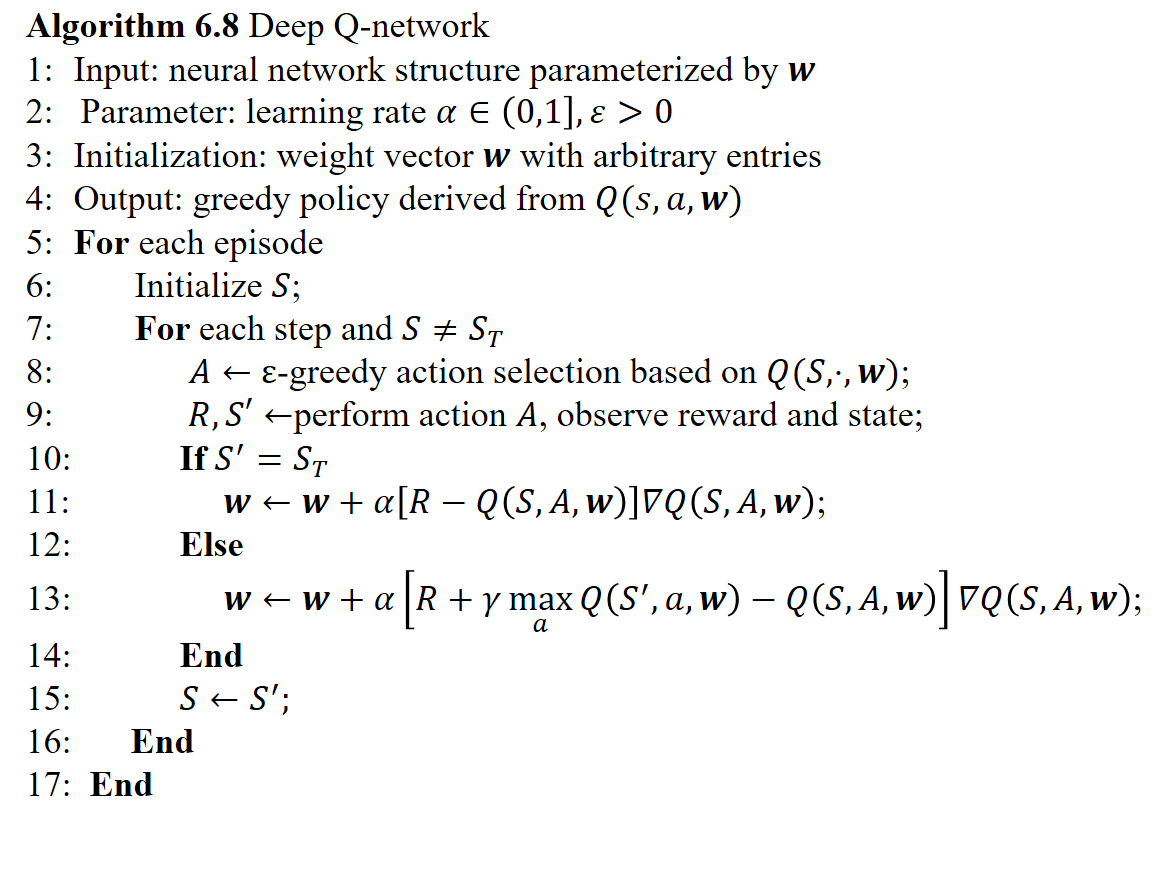

# Experiment 1 (20%)
In Sarsa or Q-learning set learning rate to 0.9~0.1 usually work well, but in approximation method set learning rate to 0.1 is too big, please test the  learning rate(self.alpha) in these numbers [0.5 0.1 0.05 0.01 0.005 0.001], and make a graph, x-axis is learning rate y-axis is average of last 100 episode returns, you can break your simulation and set average return to -500,000,when an episode have return lower than -500,000.

A： 經過觀察，learning rate使用0.5時，獲得的平均獎勵都是最差的，通常都會有直接超過-50萬，而使用0.05則是最好的。

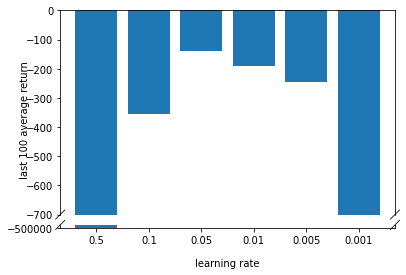

# Experiment 2 (60%)
Example code have 2 tilings, please make the 3 tilings version, the average of last 100 episode returns must higher than -300, plot your result like emaple.

A： 

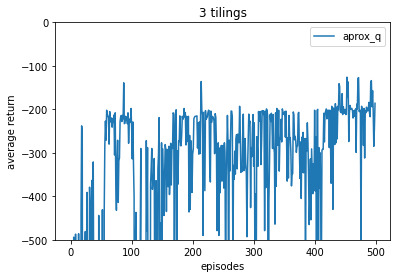

image.png